# 噪音的产生

所谓噪音，就是指在原始信号中出现了我们不希望的信号，或者干扰。了解噪音的生成方法，是为了方便我们更好的评估去噪函数。通常，在图像学领域，由于传感器的原因，会出现3种比较常见的噪音。

分别是椒盐噪音、高斯噪音以及泊松噪音。现在就来分别了解下这些噪音的产生原因，以及手工实现噪音产生的方法。

# 噪音函数

之所以降噪，是因为在图像数据的存储、传输过程中，通常会因为电子元器件之间的电磁干扰产生，又或者图像数据在传输过程中遇到来自自然界、或者人为的干扰。

举个例子来说，过去黑白电视机经常由于电信号干扰，而在图像中产生雪花。又或者是拿一个强磁，对着电子管的电视机进行干扰，而在图像中出现一些水纹波。

那么，工程师们根据经验，把常见噪音进行了以下几种的分类。

## 1. 椒盐噪音（Salt Pepper Noise）

椒盐噪声(salt-and-pepper noise)又称脉冲噪声，它随机改变一些像素值，在二值图像上表现为使一些像素点变白，一些像素点变黑。 是由图像传感器，传输信道，解码处理等产生的黑白相间的亮暗点噪声，也就是老人们比较熟悉的所谓“雪花”。

$$
N = \left\{\begin{matrix}
0 & pepper\\  
255 & salt
\end{matrix}\right.
$$

In [1]:
import numpy as np
import random


def salt_pepper_noise(image, ratio):
    output = np.zeros(image.shape, np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            rand = random.random()
            if rand < ratio:  # salt pepper noise
                if random.random() > 0.5:  # change the pixel to 255
                    output[i][j] = 255
                else:
                    output[i][j] = 0
            else:
                output[i][j] = image[i][j]

    return output

我们来尝试生成一副带有椒盐噪音的图片吧。

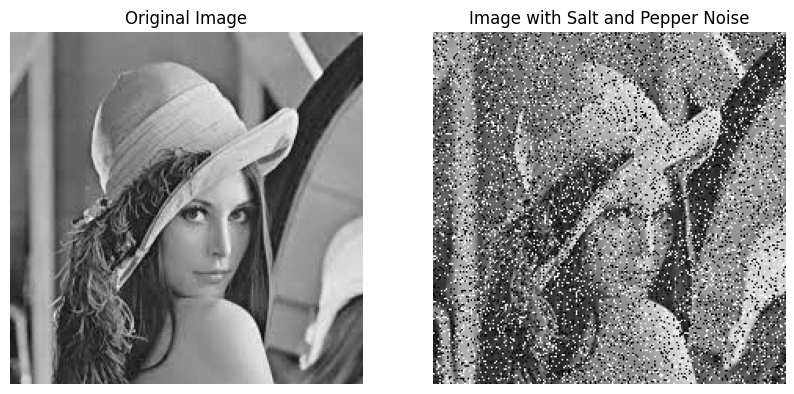

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/opt/images/lena.png', cv2.IMREAD_GRAYSCALE)

# Add salt and pepper noise
noise_img = salt_pepper_noise(image, 0.2)

# Show the original and the noise image
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(noise_img, cmap='gray')
plt.title("Image with Salt and Pepper Noise")
plt.axis('off')

plt.show()